# Global analysis

Explanations on what we are doing here

## Importation of library and functions

In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math

In [2]:
from tqdm import tqdm
from time import time

In [3]:
import Filter

In [4]:
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

# First step : extraction and filtering of the data from measures

In [5]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
run_number = 291944

In [6]:
events = de.read_root_file(data_folder, run=run_number)

Size of the data file : 139.71 Mo.
Extraction took 59.9 s.
Number of events : 1638174.


## Applications of cuts and filters

In [7]:
N_cut_pDCA=5

### Cuts on events and tracks

In [8]:
df = Filter.all_filters_muons(events, N_cut=N_cut_pDCA)


Cut nMuons [...] 
 
This cut rejects 91.15 % of the statistics

Cut CMUL [...] 
 
This cut rejects 39.02 % of the statistics

Cut zVtx [...] 
 
This cut rejects 2.91 % of the statistics
Number of tracks : 181905.

Cut eta [...] 
This cut rejects 13.45 % of the statistics

Cut pDCA [...] 
 
This cut rejects 4.65 % of the statistics
Max number of possible muons pairs : 85426

Total time needed : 59.11 s.


In [9]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   
2     0          6.179737  0.252741 -0.019221  -6.173632      -1  2.572474   
      1         17.015997 -1.085680 -1.148373 -16.942123       1  5.207280   
3     0         10.221761 -0.539462 -0.282722 -10.203053       1  3.385718   
...                   ...       ...       ...        ...     ...       ...   
85864 2          6.055975  0.298023  0.266691  -6.041831       1  3.975049   
85866 0          6.571306 -0.273575 -0.017310  -6.564736      -1  2.490599   
      1          5.076169 -0.159755  0.687732  -5.025717      -1  7.634235   
85867 0         56.574596  2.817894  1.663009 -56.479801       1  3.336261   
      1         32.024700  2.023036  0.518164 -31.956362      -1  3.756127   

                     xDCA       yDCA      zDCA       eta          P  \
entry subentry                                                        
0     0         -0.099592  -0.385877 -5.856949 -3.362807  22.552498   
      1         18.861176   8.311524 -5.856949 -3.585748   5.228546   
2     0         16.769291  35.193218 -4.562401 -3.886364   3.178833   
      1         -1.455813  -1.843493 -4.562401 -3.067481  14.615669   
3     0         15.012245 -19.045557  3.036174 -3.512566   7.821215   
...                   ...        ...       ...       ...        ...   
85864 2        -11.712676  -5.151886  0.976765 -3.409419   3.655053   
85866 0         35.016857  30.287893 -3.547436 -3.869478   3.570457   
      1         27.622868   9.959803 -3.547436 -2.660693   2.675069   
85867 0         -0.272721  -0.221081 -2.165346 -3.542460  54.174500   
      1         -0.813806  -0.307710 -2.165346 -3.422214  29.624525   

                      DCA        pDCA    s_pxDCA  
entry subentry                                    
0     0          5.870492  132.394257  56.757197  
      1         21.427301  112.033634  54.582605  
2     0         39.250315  124.770209  80.513104  
      1          5.131605   75.001837  55.715837  
3     0         24.440113  191.151369  54.884582  
...                   ...         ...        ...  
85864 2         12.832879   46.904849  54.403532  
85866 0         46.434051  165.790785  80.576934  
      1         29.577099   79.120795  54.293623  
85867 0          2.193622  118.838362  61.580293  
      1          2.333600   69.131795  57.745784  

[150118 rows x 14 columns]

In [9]:
df_dm = de.di_muons_dataframe(df)

100%|██████████| 71807/71807 [01:16<00:00, 934.86it/s] 


Execution time : 88.09


In [10]:
y_range=(-2.5, -4)
all_P_T=True
p_T_range=(0, 8)

In [11]:
df_dm = Filter.all_filters_di_muons(df_dm,  y_range=y_range, all_P_T=all_P_T, p_T_range=p_T_range)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 70992


In [12]:
df_dm

,,P1,P2,E1,E2,E,y
Event id,Muon id,,,,,,
0,"(0, 1)","[-1.3786359, 1.0393643, -24.892694]","[-0.34205338, -0.2480717, -7.616835]",24.952721,7.629278,32.581997,-3.400204
2,"(0, 1)","[0.2527406, -0.019221483, -6.173632]","[-1.0856804, -1.1483729, -16.942123]",6.179737,17.015997,23.195734,-3.180691
3,"(0, 1)","[-0.5394624, -0.28272158, -10.2030525]","[-0.19868925, 0.06468074, -5.1197624]",10.221761,5.125113,15.346874,-3.575254
5,"(0, 1)","[-1.4094948, 0.42579043, -31.101734]","[1.4731202, 1.9928731, -40.62996]",31.136747,40.705608,71.842354,-3.584052
6,"(0, 1)","[-2.1010506, -0.83825886, -21.426548]","[0.5472196, 0.710655, -8.137241]",21.545887,8.187206,29.733093,-2.929308
...,...,...,...,...,...,...,...
85856,"(0, 1)","[-0.36997738, 0.020858338, -7.599689]","[-0.36542204, 0.23081651, -8.583038]",7.609452,8.594563,16.204016,-3.663682
85858,"(0, 1)","[-0.2908406, -0.6317, -5.137554]","[0.013987565, -0.9723853, -11.005384]",5.185485,11.048773,16.234259,-2.935420
85860,"(0, 1)","[-0.6582935, -1.5861212, -14.283012]","[-0.7644689, -2.6283288, -43.22416]",14.386270,43.310875,57.697144,-3.203793


In [13]:
df_dm['M_inv'] = df_dm.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

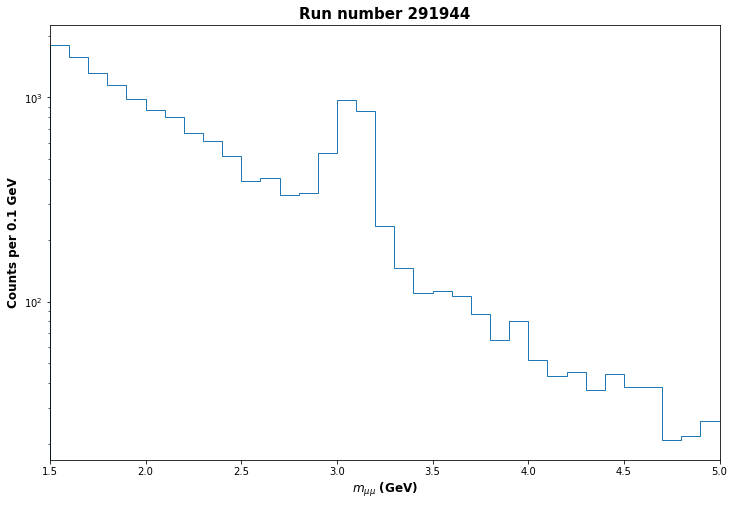

In [14]:
h = Filter.plot_M_inv(df_dm['M_inv'], run_number)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 28186
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 26853
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 9391
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 3507
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 1487
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 656


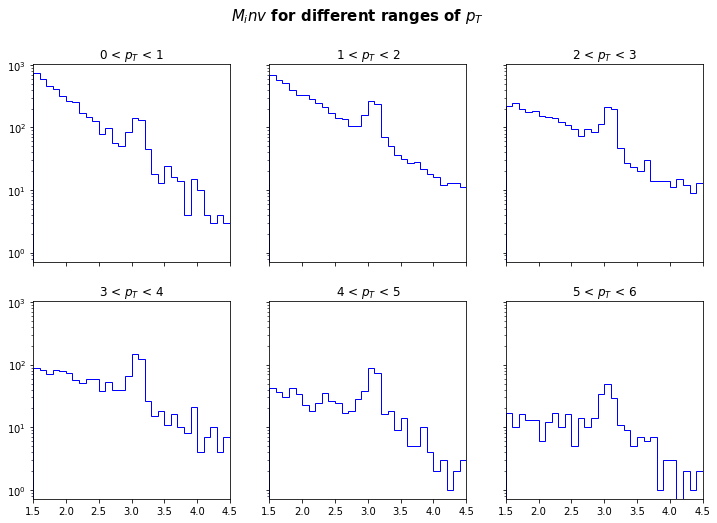

In [51]:
bins = np.linspace(1.5, 5, 36)
fig, axes = plt.subplots(2,3, figsize=(12,8), sharex=True, sharey=True)

p_T_bins = np.arange(0, 7)
axes[0, 0].set_xlim(1.5,4.5)
axes[0, 0].semilogy()


for id, ax  in enumerate(axes.flatten()) :
    p_min, p_max = p_T_bins[[id, id+1]]
    ax.set_title(f'{p_min} < $p_T$ < {p_max}')

    df_dm_selected = Filter.all_filters_di_muons(df_dm,  y_range=y_range, all_P_T=False, p_T_range=(p_min, p_max))
    df_dm_selected['M_inv'] = df_dm_selected.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)
    ax.hist(df_dm_selected['M_inv'], bins=bins, range=[1.5,5], histtype='step', align='mid', color='b')

fig.suptitle('$M_inv$ for different ranges of $p_T$', fontweight='bold', fontsize=15)
plt.savefig('M_{inv} several P_t.pdf')

Not really relevant right now, useful for later maybe but i want to keep this code somewhere

In [16]:
from scipy.optimize import curve_fit
from itertools import pairwise

x_c = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])])
m, y = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])]), h[0]

m_min, m_max = 2.7, 3.4  # range of the mass excess

i_min = np.where(m > m_min)[0][0]
i_max = np.where(m < m_max)[0][-1]

x_JP, y_JP = m[i_min:i_max + 1], y[i_min:i_max + 1]
idx = [i for i in range(i_min)] + [i for i in range(i_max, len(m))]
x_without_JP = m[idx]
y_without_JP = y[idx]



In [26]:

def double_exp(z, A, k1, k2):
    return A * np.exp(-k1 * z) + np.exp(-k2 * z)


a, t1, t2 = curve_fit(double_exp, x_without_JP, y_without_JP, p0=(1000, 1,-1))[0]

[]

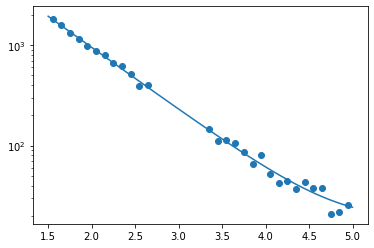

In [27]:
plt.scatter(x_without_JP, y_without_JP)
plt.plot(t, double_exp(t, a, t1, t2))
plt.semilogy()

In [28]:
a, t1, t2

(16337.799689184016, 1.4257329017901836, -0.48615042415371806)

Text(0.05, 0.5, 'Counts per 0.1 GeV')

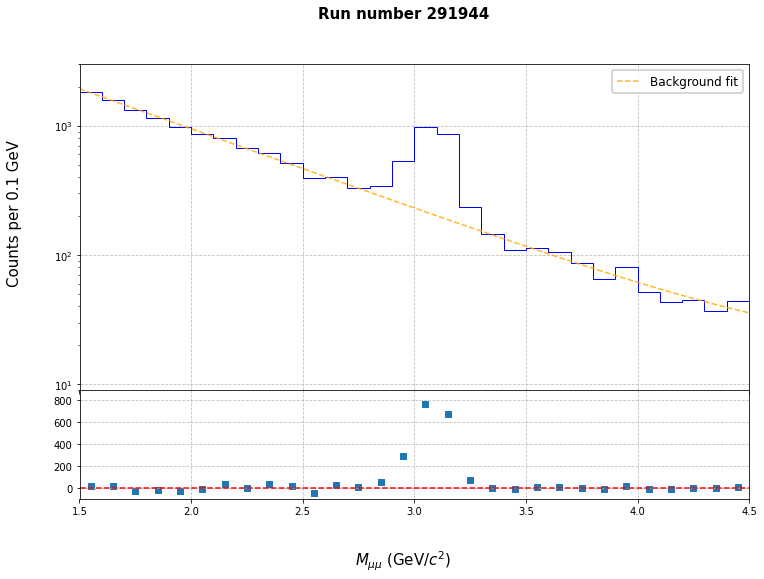

In [30]:
t = np.linspace(1.5, 5, 101)
bins = np.linspace(1.5, 5, 36)
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3,1]}, figsize=(12,8))
fig.suptitle(f'Run number {run_number}', fontsize=15, fontweight='bold')

ax[0].set_xlim(1.5,4.5)
ax[0].semilogy()
ax[0].set_ylim(9,3e3)
ax[0].set_xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)

ax[0].hist(df_dm['M_inv'], bins=bins, range=[1.5,5], histtype='step', align='mid', color='b')
ax[0].plot(t, double_exp(t, a, t1, t2), c='orange', linestyle='dashed', alpha=0.8, label='Background fit')

leg = ax[0].legend(fontsize=12)
leg.get_frame().set_linewidth(2.0)
ax[0].grid(linestyle='dashed', alpha=0.8)

ax[1].scatter(x_c, h[0] - double_exp(x_c, a, t1, t2), marker='s')
ax[1].set_ylim(-100,890)
ax[1].axhline(0, c='r', linestyle='dashed')
ax[1].grid(linestyle='dashed', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.01, '$M_{\mu\mu}$ (GeV/$c^2$)', ha='center', fontsize=15)
fig.text(0.05, 0.5, 'Counts per 0.1 GeV', ha='center', fontsize=15, rotation='vertical')